In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *

In [3]:
data = pd.read_csv(r'C:\Users\Gabriel\Desktop\INFNET\Engenharia de ML\Projeto\projeto-kobe\data\01_raw\data.csv')
data.reset_index(inplace = True)
data.head()

,index,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
data_2p = data[data['shot_type']=="2PT Field Goal"]
data_2p = data_2p[data_2p['shot_made_flag'].isna()==False]
df = data_2p[['lat','period','minutes_remaining','lon','playoffs','shot_distance','shot_made_flag']]

In [5]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
x = df.drop(columns = ['shot_made_flag']).copy()
y = df['shot_made_flag']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [6]:
df_resumo_estatistico = x_train.describe()
x_norm = (x_train-df_resumo_estatistico.loc['mean'])/df_resumo_estatistico.loc['std']
x_norm

,lat,period,minutes_remaining,lon,playoffs,shot_distance
12128,0.392145,1.330196,0.553959,1.318497,-0.419137,0.364649
7891,0.861882,-0.410644,0.262192,-0.350012,-0.419137,-1.090393
17301,0.680049,-1.281064,-0.613111,0.109898,-0.419137,-1.090393
8027,0.967952,0.459776,-0.029576,-0.082622,-0.419137,-1.354946
2472,-0.092745,1.330196,-0.321343,-0.531836,-0.419137,-0.296734
...,...,...,...,...,...,...
16771,0.967952,0.459776,-1.196646,1.564495,-0.419137,0.629202
17806,0.573979,1.330196,-1.488413,1.339888,-0.419137,0.364649
7690,0.967952,1.330196,0.553959,-0.082622,-0.419137,-1.354946
1203,0.998258,0.459776,1.429261,-1.900869,-0.419137,0.893755


In [112]:
from sklearn.metrics import log_loss
n_folds = 10
params = {
        'penalty':['l1','l2'],
        'C':[1,2,10]}
        
cv =StratifiedKFold(n_splits = n_folds)
s = setup(df, target = 'shot_made_flag', session_id= 123)
compare_models()
#metrics = get_metrics()
#add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)
#exp_logs = get_logs()
lr = create_model('lr')
tuned_lr = tune_model(lr)
predictions = predict_model(tuned_lr)
clf_pycaret = save_model(tuned_lr,'best_lr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:34:35
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5613,0.5813,0.4543,0.5490,0.4972,0.1142,0.1158
1,0.5887,0.6115,0.5236,0.5763,0.5487,0.1725,0.1732
2,0.5951,0.6162,0.5147,0.5866,0.5483,0.1842,0.1855
3,0.5761,0.5976,0.4631,0.5688,0.5106,0.1435,0.1459
4,0.5901,0.5998,0.4853,0.5854,0.5306,0.1725,0.1749
5,0.5641,0.5942,0.4690,0.5511,0.5068,0.1207,0.1220
6,0.5704,0.5870,0.4705,0.5596,0.5112,0.1331,0.1347
7,0.5761,0.5840,0.4941,0.5640,0.5267,0.1458,0.1469
8,0.5662,0.5963,0.4653,0.5536,0.5056,0.1243,0.1258


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:35:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5613,0.5813,0.4543,0.5490,0.4972,0.1142,0.1158
1,0.5887,0.6115,0.5236,0.5763,0.5487,0.1725,0.1732
2,0.5951,0.6162,0.5147,0.5866,0.5483,0.1842,0.1855
3,0.5761,0.5976,0.4631,0.5688,0.5106,0.1435,0.1459
4,0.5901,0.5998,0.4853,0.5854,0.5306,0.1725,0.1749
5,0.5641,0.5942,0.4690,0.5511,0.5068,0.1207,0.1220
6,0.5704,0.5870,0.4705,0.5596,0.5112,0.1331,0.1347
7,0.5761,0.5840,0.4941,0.5640,0.5267,0.1458,0.1469
8,0.5662,0.5963,0.4653,0.5536,0.5056,0.1243,0.1258


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5613,0.5813,0.4543,0.5490,0.4972,0.1142,0.1158
1,0.5887,0.6115,0.5236,0.5763,0.5487,0.1725,0.1732
2,0.5951,0.6162,0.5147,0.5866,0.5483,0.1842,0.1855
3,0.5761,0.5976,0.4631,0.5688,0.5106,0.1435,0.1459
4,0.5901,0.5998,0.4853,0.5854,0.5306,0.1725,0.1749
5,0.5641,0.5942,0.4690,0.5511,0.5068,0.1207,0.1220
6,0.5704,0.5870,0.4705,0.5596,0.5112,0.1331,0.1347
7,0.5761,0.5840,0.4941,0.5640,0.5267,0.1458,0.1469
8,0.5662,0.5963,0.4653,0.5536,0.5056,0.1243,0.1258


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:35:18
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5634,0.5784,0.4543,0.5520,0.4984,0.1183,0.1200
1,0.5930,0.6097,0.5236,0.5820,0.5512,0.1807,0.1816
2,0.5979,0.6136,0.5074,0.5921,0.5465,0.1891,0.1910
3,0.5754,0.5938,0.4587,0.5686,0.5078,0.1418,0.1444
4,0.5923,0.5972,0.4794,0.5898,0.5289,0.1762,0.1791
5,0.5662,0.5930,0.4720,0.5536,0.5096,0.1251,0.1263
6,0.5683,0.5876,0.4617,0.5579,0.5052,0.1284,0.1302
7,0.5746,0.5862,0.4853,0.5634,0.5214,0.1424,0.1437
8,0.5718,0.5910,0.4653,0.5615,0.5089,0.1352,0.1371


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5718,0.5968,0.4885,0.5589,0.5213,0.1371,0.1381


Transformation Pipeline and Model Successfully Saved


In [117]:
predictions
pull()['Accuracy']

0    0.5718
Name: Accuracy, dtype: float64

In [71]:
from sklearn.linear_model import LogisticRegression
n_folds = 10
params = {
        'penalty':['l1','l2'],
        'C':[1,2,10]
        }
cv =StratifiedKFold(n_splits = n_folds)
model_template =  LogisticRegression(solver = 'saga', max_iter = 10000)
clf = GridSearchCV(
        model_template,
        params,
        cv = cv,
        scoring=['f1','precision','recall'],
        refit = 'f1',
        return_train_score=True,
        n_jobs = 4
        )
clf.fit(x_train,y_train)



c:\Users\Gabriel\Desktop\INFNET\Engenharia de ML\Projeto\projeto\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=4, param_grid={'C': [1, 2, 10], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring=['f1', 'precision', 'recall'], verbose=0)

In [77]:
clf.cv_results_['std_test_f1'][clf.best_index_]

0.014952012509610256

In [8]:
x_norm.describe()

,lat,period,minutes_remaining,lon,playoffs,shot_distance
count,1.622800e+04,1.622800e+04,1.622800e+04,1.622800e+04,1.622800e+04,1.622800e+04
mean,-5.465154e-14,6.983705e-17,-8.822674e-17,4.857156e-14,-1.015812e-16,-6.184629e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.592960e+00,-1.281064e+00,-1.488413e+00,-2.414257e+00,-4.191368e-01,-1.354946e+00
25%,-8.352333e-01,-1.281064e+00,-9.048783e-01,-5.425319e-01,-4.191368e-01,-1.222670e+00
50%,2.860753e-01,4.597758e-01,-2.957589e-02,-8.262242e-02,-4.191368e-01,2.323724e-01
75%,9.679521e-01,4.597758e-01,8.457265e-01,7.195453e-01,-4.191368e-01,8.937552e-01
max,1.634676e+00,3.941456e+00,1.721029e+00,2.270403e+00,2.385709e+00,2.084244e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               30697 non-null  int64  
 1   action_type         30697 non-null  object 
 2   combined_shot_type  30697 non-null  object 
 3   game_event_id       30697 non-null  int64  
 4   game_id             30697 non-null  int64  
 5   lat                 30697 non-null  float64
 6   loc_x               30697 non-null  int64  
 7   loc_y               30697 non-null  int64  
 8   lon                 30697 non-null  float64
 9   minutes_remaining   30697 non-null  int64  
 10  period              30697 non-null  int64  
 11  playoffs            30697 non-null  int64  
 12  season              30697 non-null  object 
 13  seconds_remaining   30697 non-null  int64  
 14  shot_distance       30697 non-null  int64  
 15  shot_made_flag      25697 non-null  float64
 16  shot

In [6]:
#Separando os dados de 2 pontos
data_2p = data[data['shot_type']=='2PT Field Goal']
data_2p = data_2p[data_2p['shot_made_flag'].isna()==False]
data_2p


In [7]:
#Filtrando as colunas de interesse
df = data_2p[['lat','period','minutes_remaining','lon','playoffs','shot_distance','shot_made_flag']]
df

,lat,period,minutes_remaining,lon,playoffs,shot_distance,shot_made_flag
0,33.9723,1,10,-118.1028,0,18,NaN
1,34.0443,1,10,-118.4268,0,15,0.0
2,33.9093,1,7,-118.3708,0,16,1.0
3,33.8693,1,6,-118.1318,0,22,0.0
4,34.0443,2,6,-118.2698,0,0,1.0
...,...,...,...,...,...,...,...
30691,34.0443,4,7,-118.2698,1,0,0.0
30692,33.9963,4,6,-118.2688,1,4,0.0
30693,34.0443,4,6,-118.2698,1,0,NaN
30694,33.8783,4,3,-118.4038,1,21,1.0


In [8]:
#Verificando dados faltantes ou nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24271 entries, 0 to 30696
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lat                24271 non-null  float64
 1   period             24271 non-null  int64  
 2   minutes_remaining  24271 non-null  int64  
 3   lon                24271 non-null  float64
 4   playoffs           24271 non-null  int64  
 5   shot_distance      24271 non-null  int64  
 6   shot_made_flag     20285 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 1.5 MB


<Axes: >

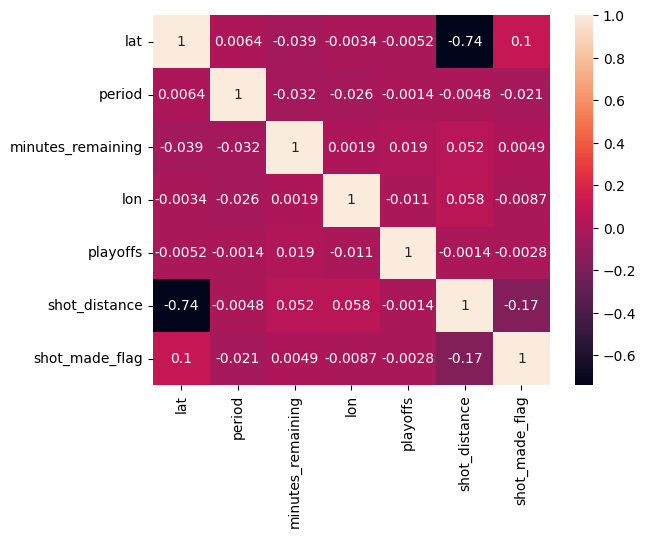

In [109]:
#Vendo se os gráficos tem correlação
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True)

#Existe c

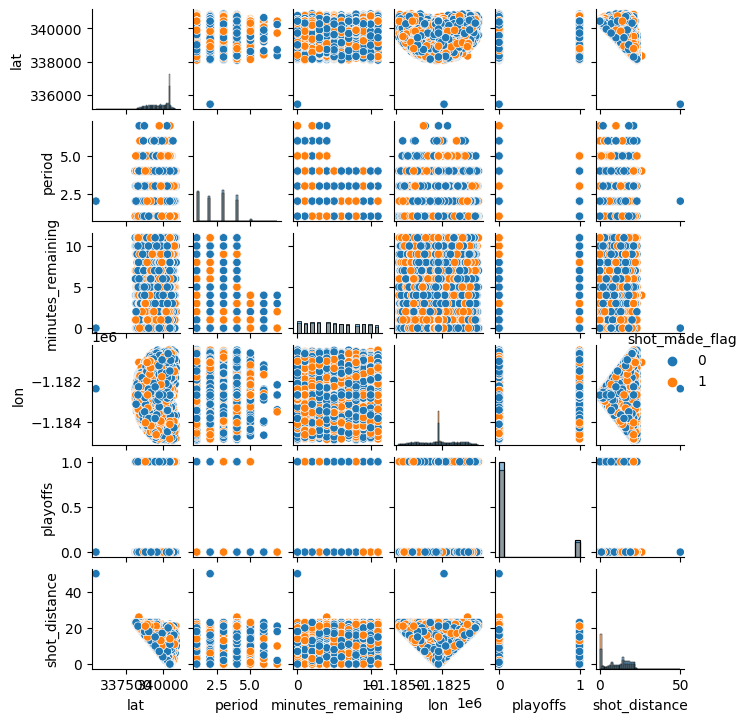

In [123]:
g = sns.pairplot(df, diag_kind='hist',hue = 'shot_made_flag')
g.fig.set_size_inches(10,10)